# **Machine Learning: Clasificación con SKLearn**



#Introducción a la clasificación

In [ ]:
#features 1=True y 0=False
#Distincion entre perro y gato
# tiene pelo largo?
# tiene uñas afiladas?
# hace miau?

perro1=[0,1,1]
perro2=[1,0,1]
perro3=[1,1,1]

gato1=[0,1,0]
gato2=[0,1,1]
gato3=[1,1,0]

x_train=[perro1,perro2,perro3,gato1,gato2,gato3] #x de entrenamiento (atributos)
y_train=[1,1,1,0,0,0] #y de entrenamiento (resultado de cada conjunto de atributos)

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [ ]:
animal_misterioro = [1,1,1]

model.predict([animal_misterioro])

array([1])

In [ ]:
misterio1=[1,1,1]
misterio2=[1,1,0]
misterio3=[0,1,1]

x_test = [misterio1,misterio2,misterio3]
y_test = [0,1,1] #valor real

In [ ]:
previsiones=model.predict(x_test)

In [ ]:
correctos=(previsiones==y_test).sum()
total=len(x_test)
tasa_acierto = correctos/total
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 33.33%


In [ ]:
from sklearn.metrics import accuracy_score

tasa_acierto = accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 33.33%


#Pruebas replicables, estratificación, lectura de datos de internet

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
80,0,0,1,0
75,0,1,0,0
63,0,1,0,0
15,0,0,1,0
38,1,1,0,0


In [ ]:
mapa={ 'home':'principal',
      'how_it_works':'como_funciona',
       'contact':'contacto',
       'bought':'compro'}

datos=datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
86,1,1,0,0
5,1,0,1,1
57,1,1,0,0


In [ ]:
x=datos[['principal','como_funciona','contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
y=datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [ ]:
datos.shape

(99, 4)

In [ ]:
x_train=x[:75]
y_train=y[:75]
x_test = x[75:]
y_test=y[75:]

In [ ]:
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos')

Entrenaremos con 75 elementos y probaremos con 24 elementos


In [ ]:
model= LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 95.83%


In [ ]:
#SKLearn contiene un metodo que divide el data set en parte de entrenamiento y parte de prueba

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25)

In [ ]:
model= LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 96.0%


In [ ]:
SEED=40 #permite reproducir nuevamente el estado de aleatoriedad de la particion de los datos entre entrenamiento y test

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)

model= LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 100.0%


In [ ]:
#estrtificando Splits

In [ ]:
x_train=x[:75]
y_train=y[:75]
x_test = x[75:]
y_test=y[75:]

In [ ]:
y_train.value_counts()

0    48
1    27
Name: compro, dtype: int64

In [ ]:
#proporcion de compras realizadas en el entrenamiento
27/75

0.36

In [ ]:
y_test.value_counts()

0    18
1     6
Name: compro, dtype: int64

In [ ]:
#proporcion de compras realizadas en las pruebas
6/24

0.25

In [ ]:
SEED=40 #permite reproducir nuevamente el estado de aleatoriedad de la particion de los datos entre entrenamiento y test

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)

model= LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 100.0%


In [ ]:
y_train.value_counts()

0    51
1    23
Name: compro, dtype: int64

In [ ]:
y_test.value_counts()

0    15
1    10
Name: compro, dtype: int64

In [ ]:
print(f'Tasa de compra en train={23/75} y en test={10/24}')

Tasa de compra en train=0.30666666666666664 y en test=0.4166666666666667


#Proyecto de baja dimensionalidad

In [ ]:
uri ='https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos=pd.read_csv(uri)
datos.sample(5)

,unfinished,expected_hours,price
1425,0,14,265
506,1,86,3098
1435,0,84,11538
142,1,12,189
2073,0,42,554


In [ ]:
mapa= {'unfinished':'no_finalizado',
       'expected_hours':'horas_esperadas',
       'price':'precio'}

datos=datos.rename(columns=mapa)
datos

,no_finalizado,horas_esperadas,precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
cambio = {1:0,0:1}

datos['finalizado']=datos.no_finalizado.map(cambio)

datos

,no_finalizado,horas_esperadas,precio,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [ ]:
import seaborn as sns

<Axes: xlabel='horas_esperadas', ylabel='precio'>

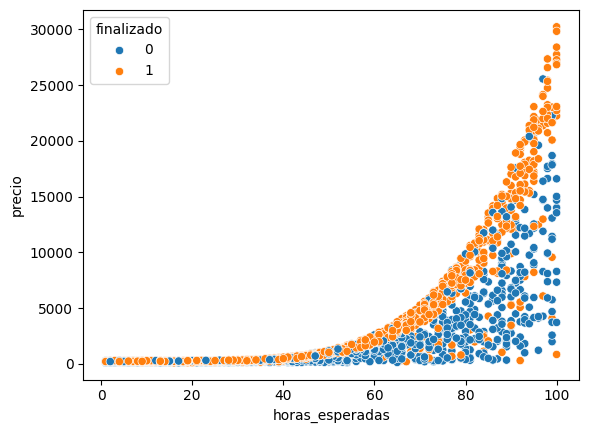

In [ ]:
sns.scatterplot(x='horas_esperadas',y='precio',data=datos, hue='finalizado')

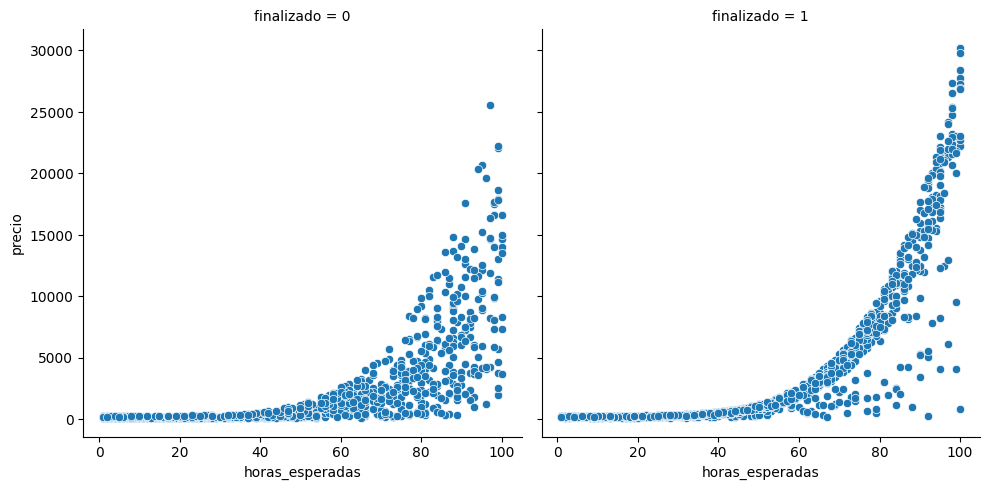

In [ ]:
sns.relplot(x='horas_esperadas',y='precio',data=datos, col='finalizado')

In [ ]:
#establecer la seed desde el principio con numpy
import numpy as np

x=datos[['horas_esperadas','precio']]
y=datos.finalizado

SEED=40
np.random.seed(SEED)
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(y_train)} elementos y probamos con {len(y_test)}')

model= LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

Entrenamos con 1617 elementos y probamos con 540
La tasa de acierto fue de 66.48%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sys import base_prefix
base_previsiones= np.ones(540)

tasa_acierto= accuracy_score(y_test,base_previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

La tasa de acierto fue de 54.26%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

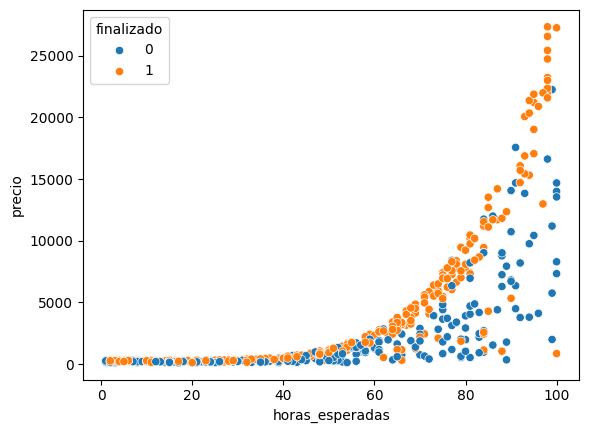

In [ ]:
sns.scatterplot(x='horas_esperadas', y='precio',hue=y_test, data=x_test)

In [ ]:
x_min=x_test.horas_esperadas.min()
x_max=x_test.horas_esperadas.max()
y_min=x_test.precio.min()
y_max=x_test.precio.max()

In [ ]:
pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)

In [ ]:
xx,yy = np.meshgrid(eje_x,eje_y)
puntos= np.c_[xx.ravel(),yy.ravel()]
puntos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.707058e+04],
       [9.802000e+01, 2.707058e+04],
       [9.901000e+01, 2.707058e+04]])

In [ ]:
z=model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
z=z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

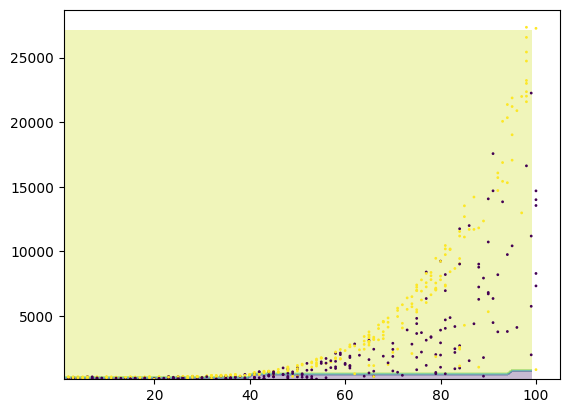

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z, alpha=0.3)
plt.scatter(x_test.horas_esperadas,x_test.precio,c=y_test,s=1)

#Support Vector Machine y sistemas no lineales

Entrenamos con 1617 elementos y probamos con 540


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


La tasa de acierto fue de 56.67%


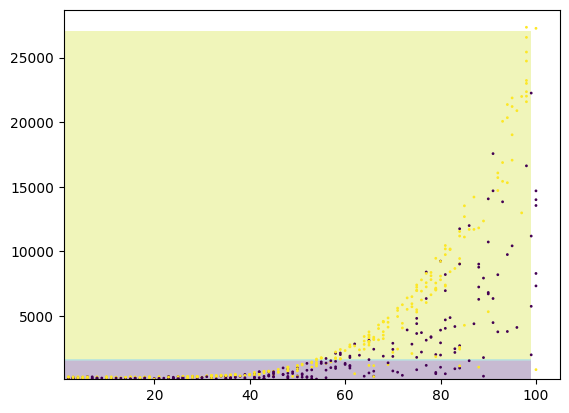

In [ ]:
from sklearn.svm import SVC

x=datos[['horas_esperadas','precio']]
y=datos.finalizado

np.random.seed(SEED)
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(y_train)} elementos y probamos con {len(y_test)}')

model= SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)


x_min=x_test.horas_esperadas.min()
x_max=x_test.horas_esperadas.max()
y_min=x_test.precio.min()
y_max=x_test.precio.max()

pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)

xx,yy = np.meshgrid(eje_x,eje_y)
puntos= np.c_[xx.ravel(),yy.ravel()]

z=model.predict(puntos)
z=z.reshape(xx.shape)


plt.contourf(xx,yy,z, alpha=0.3)
plt.scatter(x_test.horas_esperadas,x_test.precio,c=y_test,s=1)

print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

In [ ]:
#este algoritmo no trabaja bien con datos que no estan en la misma escala, entre y y x
#debemos estandarizar uno al otro para emplearlo

Entrenamos con 1617 elementos y probamos con 540
La tasa de acierto fue de 68.15%


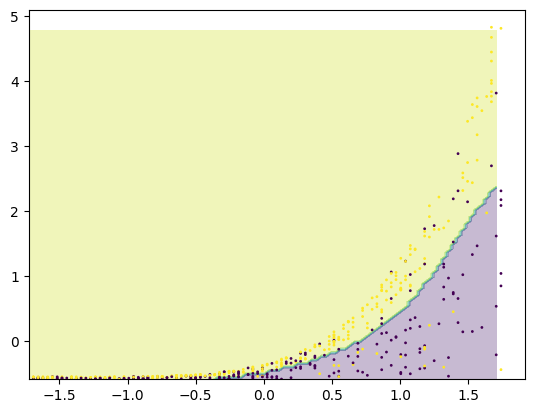

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x=datos[['horas_esperadas','precio']]
y=datos.finalizado

np.random.seed(SEED)
raw_x_train,raw_x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(y_train)} elementos y probamos con {len(y_test)}')

scaler= StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)


model= SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)
tasa_acierto= accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

data_x= x_test[:,0]
data_y=x_test[:,1]
x_min=data_x.min()
x_max=data_x.max()
y_min=data_y.min()
y_max=data_y.max()

pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)

xx,yy = np.meshgrid(eje_x,eje_y)
puntos= np.c_[xx.ravel(),yy.ravel()]

z=model.predict(puntos)
z=z.reshape(xx.shape)


plt.contourf(xx,yy,z, alpha=0.3)
plt.scatter(data_x,data_y,c=y_test,s=1)

# Dummy classifiers y Árboles de decisión

In [ ]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
datos= pd.read_csv(uri)
datos.sample(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
3994,3994,8485,2008,34875.19,yes
1062,1062,31500,2015,109300.14,no
5092,5092,11393,1999,66401.87,no
9432,9432,7700,2004,78711.30,no
4654,4654,10225,2006,48910.12,yes


In [ ]:
mapa={'mileage_per_year':'millas_por_ano',
      'model_year':'ano_modelo',
      'price':'precio',
      'sold':'vendido'}
datos=datos.rename(columns=mapa)
datos.sample(5)

,Unnamed: 0,millas_por_ano,ano_modelo,precio,vendido
9127,9127,13437,2001,31008.17,yes
8286,8286,19257,1999,104827.16,no
7913,7913,8126,2014,74699.27,no
4667,4667,11215,2000,30510.19,yes
2036,2036,16022,2001,99192.02,no


In [ ]:
cambio={'yes':1,'no':0}
datos.vendido=datos.vendido.map(cambio)
datos.sample(5)

,Unnamed: 0,millas_por_ano,ano_modelo,precio,vendido
1808,1808,21290,1998,28816.61,1
4105,4105,11302,2004,83037.90,1
997,997,9879,2011,79243.13,1
534,534,15604,2013,46181.50,1
9714,9714,20303,1999,64877.91,0


In [ ]:
from datetime import datetime
ano_actual=datetime.today().year
datos['edad_del_modelo']=ano_actual - datos.ano_modelo
datos.sample(5)

,Unnamed: 0,millas_por_ano,ano_modelo,precio,vendido,edad_del_modelo
9096,9096,16852,2002,63458.77,0,22
1485,1485,7654,2008,71193.73,1,16
7190,7190,8483,2007,60852.83,1,17
3899,3899,8798,2012,72315.29,0,12
1097,1097,24691,1998,41478.58,1,26


In [ ]:
#1.60934km, equivalen a una milla

datos['km_por_ano']=datos.millas_por_ano*1.60934
datos.sample(5)

,Unnamed: 0,millas_por_ano,ano_modelo,precio,vendido,edad_del_modelo,km_por_ano
2065,2065,8399,2005,94490.01,0,19,13516.84666
4964,4964,10069,1998,32632.88,1,26,16204.44446
7239,7239,10440,2008,59112.95,1,16,16801.50960
2199,2199,18688,1999,72616.11,0,25,30075.34592
780,780,10870,2008,85152.64,0,16,17493.52580


In [ ]:
datos = datos.drop(columns=['Unnamed: 0','millas_por_ano','ano_modelo'],axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
679,82571.99,0,23,29137.1007
928,51258.26,1,14,44844.2591
7923,27701.94,1,21,17710.7867


In [ ]:
x=datos[['edad_del_modelo','precio','km_por_ano']]
y=datos[['vendido']]

np.random.seed(SEED)
raw_x_train,raw_x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(raw_x_train)} elementos y probamos con {len(raw_x_test)}')

scaler= StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)


model= SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

Entrenamos con 7500 elementos y probamos con 2500


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La tasa de acierto fue de 77.4%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy= DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud= dummy.score(x_test,y_test)*100

print(f'La exactitud del clasificador del clasificador Dummy stratified fue {round(exactitud,2)}%')

La exactitud del clasificador del clasificador Dummy stratified fue 52.72%


In [ ]:
dummy= DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud= dummy.score(x_test,y_test)*100

print(f'La exactitud del clasificador del clasificador Dummy most frequent fue {round(exactitud,2)}%')

La exactitud del clasificador del clasificador Dummy most frequent fue 58.08%


## Arbol de decisión y visualizacion de reglas de decisión

In [ ]:
#Con standarScale

from sklearn.tree import DecisionTreeClassifier
#buscamos entender como funciona el algoritmo, no mejorar el modelo
x=datos[['edad_del_modelo','precio','km_por_ano']]
y=datos[['vendido']]

np.random.seed(SEED)
raw_x_train,raw_x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(raw_x_train)} elementos y probamos con {len(raw_x_test)}')

scaler= StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)


model= DecisionTreeClassifier()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

Entrenamos con 7500 elementos y probamos con 2500
La tasa de acierto fue de 79.72%


In [ ]:
from ast import GeneratorExp
from sklearn.tree import export_graphviz
import graphviz

features=x.columns
dot_data=export_graphviz(model, feature_names=features)
grafico= graphviz.Source(dot_data)

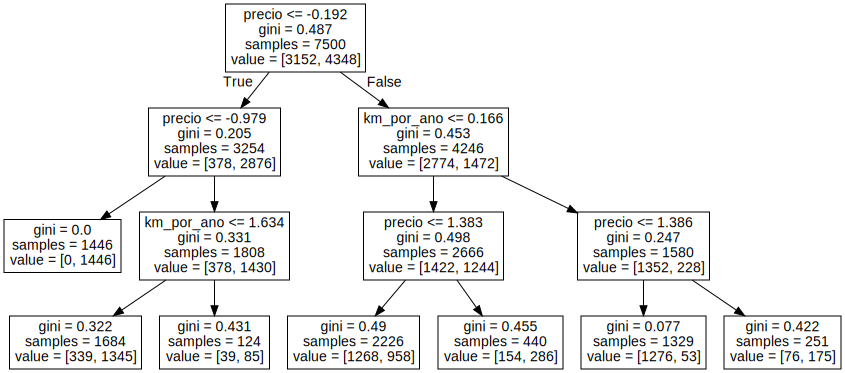

In [ ]:
grafico

In [ ]:
#Sin estandarizar los datos y con pasos limitados
x=datos[['edad_del_modelo','precio','km_por_ano']]
y=datos[['vendido']]

np.random.seed(SEED)
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)}')

#max_depth limita la profundidad del arbol de decision(pasos)
model= DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

Entrenamos con 7500 elementos y probamos con 2500
La tasa de acierto fue de 79.72%


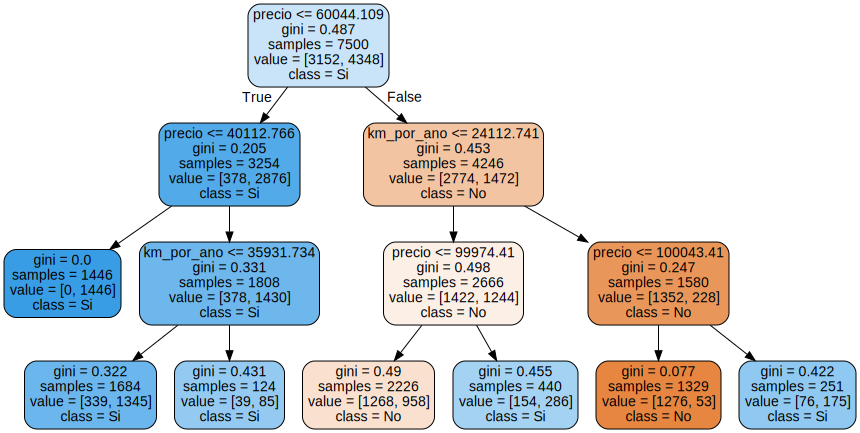

In [ ]:
features=x.columns
dot_data=export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Si'])
grafico= graphviz.Source(dot_data)
grafico